# 1. Library and Constants

In [13]:
import os
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

# 2. Exploratory Data Analysis (EDA)

In [15]:
data_dictionary_df = pd.read_csv(r'data\data_dictionary.csv')
# data_dictionary_df

In [16]:
train_df = pd.read_csv(r'data\train.csv')
print(train_df.shape)
train_df.head()

(3960, 82)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


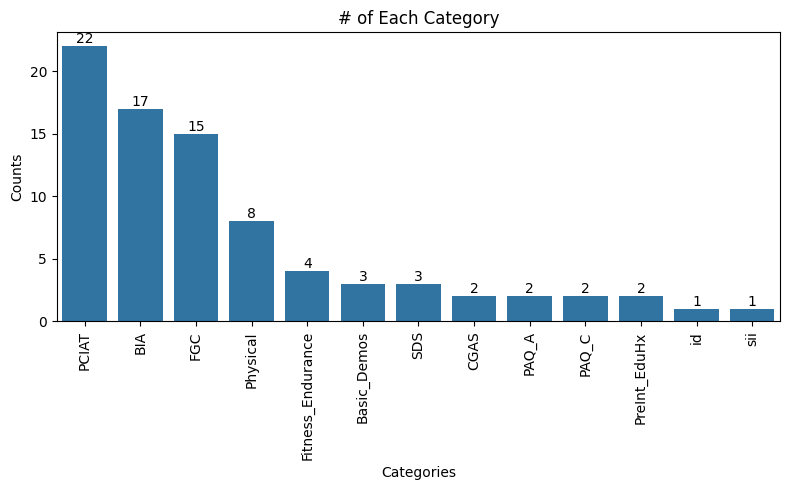

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Count of each category
variable_categories = set(map(lambda x: x.split(sep='-')[0], train_df.columns.values))
variable_category_count = Counter(map(lambda x: x.split(sep='-')[0], train_df.columns.values))

# Sort of category count
variable_category_count = dict(variable_category_count.most_common())

# Create bar plot
ax = sns.barplot(x=variable_category_count.keys(), y=variable_category_count.values())
ax.set(xlabel='Categories', ylabel='Counts', title='# of Each Category')
ax.bar_label(ax.containers[0])
plt.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## 2.1 Demographic Data

In [90]:
# Change from 0 to male and 1 to female
train_df['Basic_Demos-Sex'].replace({0: 'male', 1: 'female'}, inplace=True)

# Get the demographic data
train_df.loc[:5, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Basic_Demos']

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex
0,Fall,5,male
1,Summer,9,male
2,Summer,10,female
3,Winter,9,male
4,Spring,18,female
5,Spring,13,female


In [91]:
basic_demos_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Basic_Demos']

print('\n------------------------Type & Null Analysis------------------------')
print(basic_demos_train_df.info())

print('\n------------------------Categorical Analysis------------------------')
print(basic_demos_train_df.describe(include='object'))

print('\n-------------------------Numerical Analysis-------------------------')
print(basic_demos_train_df.describe(exclude='object').round(2))


------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  3960 non-null   object
 1   Basic_Demos-Age            3960 non-null   int64 
 2   Basic_Demos-Sex            3960 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.9+ KB
None

------------------------Categorical Analysis------------------------
       Basic_Demos-Enroll_Season Basic_Demos-Sex
count                       3960            3960
unique                         4               2
top                       Spring            male
freq                        1127            2484

-------------------------Numerical Analysis-------------------------
       Basic_Demos-Age
count          3960.00
mean             10.43
std               3.57
min             

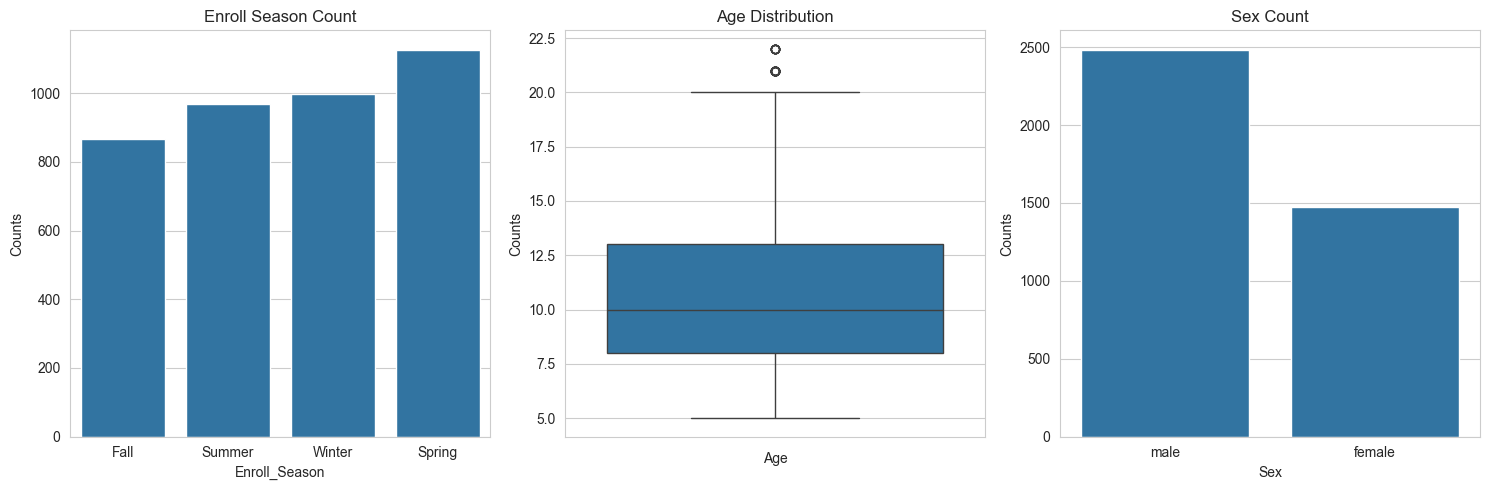

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=train_df['Basic_Demos-Enroll_Season'], ax=axes[0])
axes[0].set(xlabel='Enroll_Season', ylabel='Counts', title='Enroll Season Count')

sns.boxplot(train_df['Basic_Demos-Age'], ax=axes[1])
axes[1].set(xlabel='Age', ylabel='Counts', title='Age Distribution')

sns.countplot(x=train_df['Basic_Demos-Sex'], ax=axes[2])
axes[2].set(xlabel='Sex', ylabel='Counts', title='Sex Count')

plt.tight_layout()
plt.show()

## 2.2 Internet Use

In [ ]:
train_df.select_dtypes('object')

## 2.2 Numerical Variable EDA

In [ ]:
train_df.select_dtypes(['int', 'float'])